#### 1. Выберите наборы данных, которые можно интерпретировать, как временные ряды:

*а) зависимость цены на недвижимость в конкретном регионе от времени*

это временной ряд

*б) скорость полета самолета при перелете из аэропорта А в аэропорт В*

если рассматривать изменение скорости в привязке ко временным промежуткам, то это временной ряд

*в) количество отказов компьютера*

раз нет привязки ко времени, это не временной ряд

*г) число обращений в поликлинику по району*

раз нет привязки ко времени, это не временной ряд

*д) координаты автобуса при движении по маршруту*

если есть привязка ко времени, то это будет временной ряд. если просто координаты, то нет.

*е) координаты фигуры нарушителя в файле видеофиксации охранной системы*

если есть привязка к времени, то это временной ряд. если просто координаты без времени, то нет.

### 2. вариант 1) 
#### Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head(20)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [5]:
data['DUQ_MW'].isnull().sum()

0

In [6]:
ut = data.index.unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [7]:
data.index.value_counts().nlargest()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

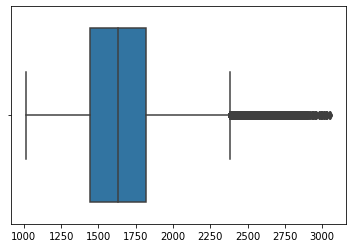

In [8]:
sns.boxplot(data.values)

Text(0, 0.5, 'МВт')

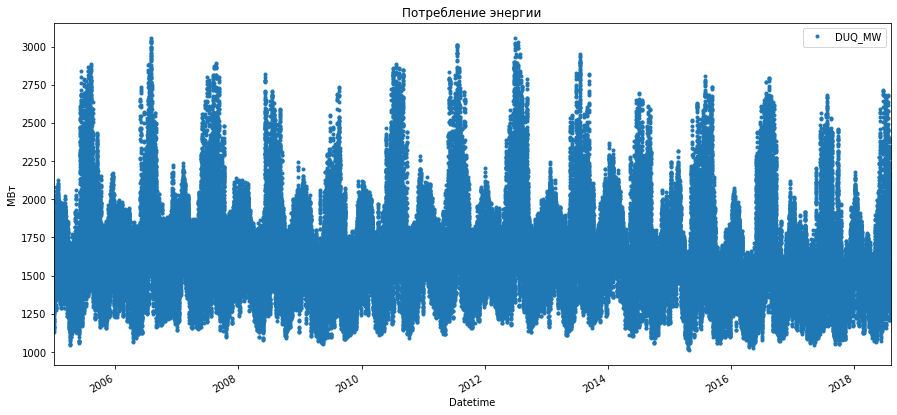

In [9]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'Потребление энергии')
plt.ylabel ( 'МВт' )

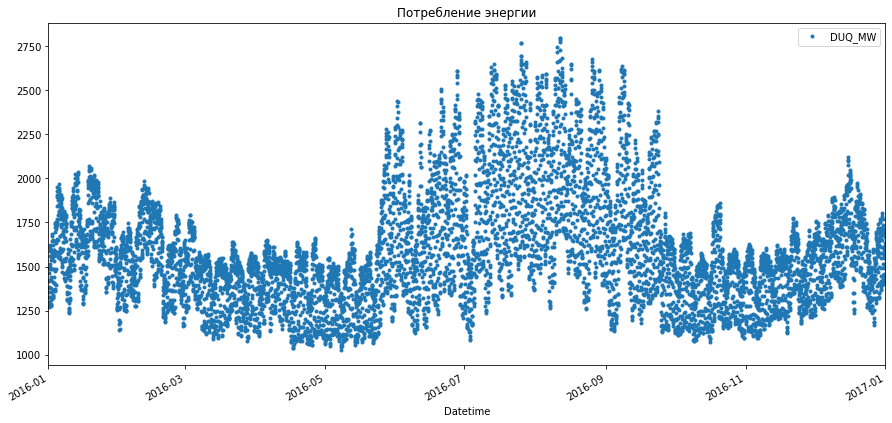

In [10]:
data['2016-01-01 00:00:00':'2017-01-01 00:00:00'].plot( style='.', figsize=( 15, 7 ), title='Потребление энергии' )

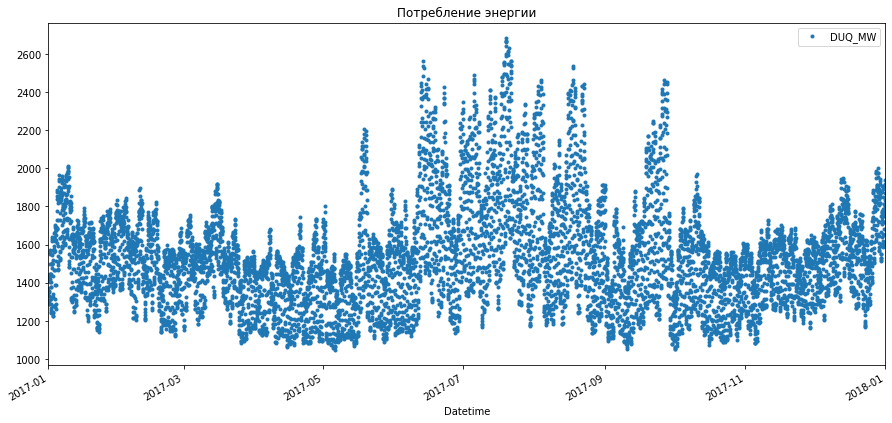

In [11]:
data['2017-01-01 00:00:00':'2018-01-01 00:00:00'].plot( style='.', figsize=( 15, 7 ), title='Потребление энергии' )

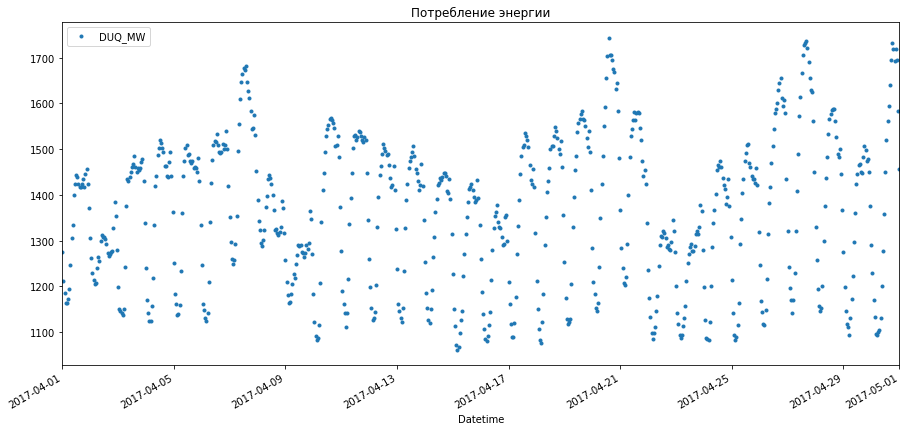

In [12]:
data['2017-04-01 00:00:00':'2017-05-01 00:00:00'].plot( style='.', figsize=( 15, 7 ), title='Потребление энергии' )

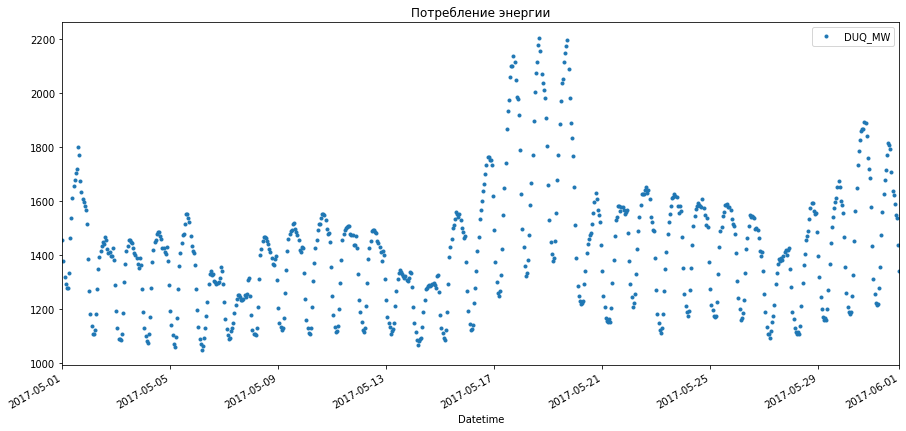

In [13]:
data['2017-05-01 00:00:00':'2017-06-01 00:00:00'].plot( style='.', figsize=( 15, 7 ), title='Потребление энергии' )

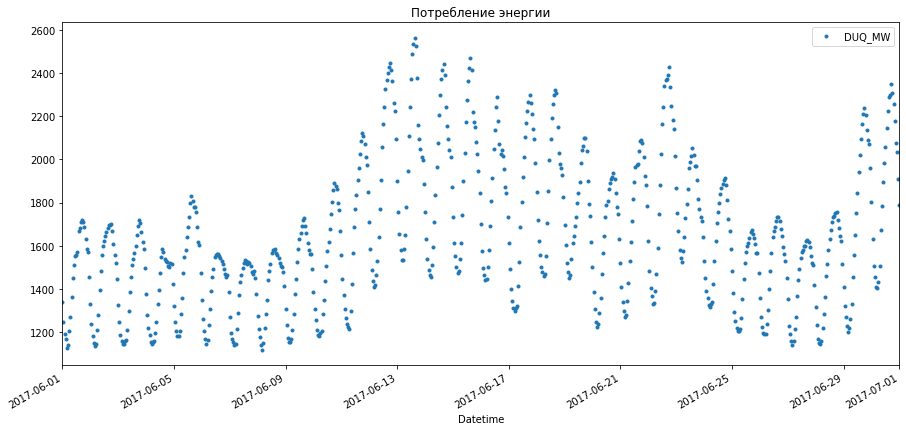

In [14]:
data['2017-06-01 00:00:00':'2017-07-01 00:00:00'].plot( style='.', figsize=( 15, 7 ), title='Потребление энергии' )

* пропусков нет. 
* видна сезонность, день/ночь
* видны одинаковые всплески с января по март и с июня по октябрь.


### 3. вариант 1) 
#### Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [15]:
data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [16]:
week = data.resample("W")

In [17]:
week.mean().tail()

,Значение
Дата,
2019-08-04,62.791667
2019-08-11,58.236667
2019-08-18,59.033333
2019-08-25,59.495000
2019-09-01,59.348333


In [18]:
week.std().tail()

,Значение
Дата,
2019-08-04,2.035637
2019-08-11,1.205681
2019-08-18,0.952904
2019-08-25,0.959849
2019-09-01,0.749918


In [19]:
month = data.resample("M")

In [20]:
month.mean().tail()

,Значение
Дата,
2019-05-31,69.966667
2019-06-30,62.980400
2019-07-31,64.292963
2019-08-31,59.263077
2019-09-30,58.840000


In [21]:
month.std().tail()

,Значение
Дата,
2019-05-31,2.387897
2019-06-30,1.874901
2019-07-31,1.373023
2019-08-31,1.191479
2019-09-30,NaN


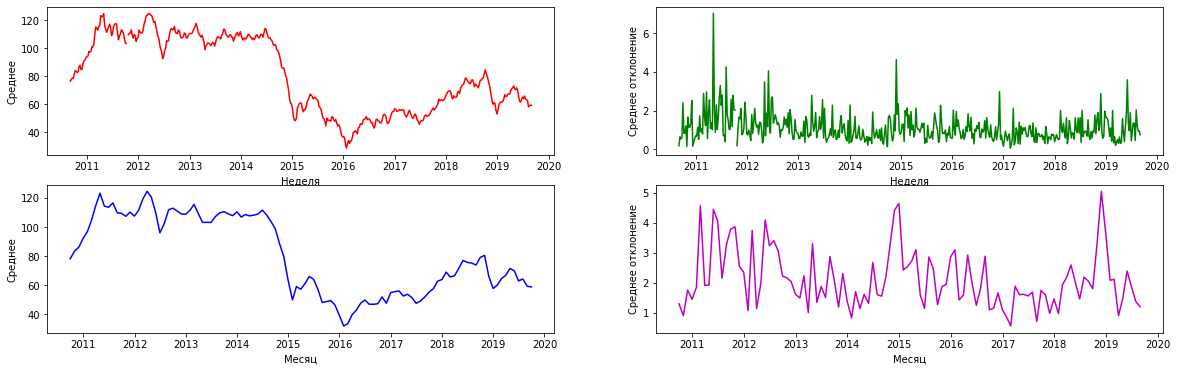

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(week.mean().index, week.mean().values, 'r')
plt.ylabel('Среднее')
plt.xlabel('Неделя')

plt.subplot(2,2,2)
plt.plot(week.std().index, week.std().values, 'g')
plt.ylabel('Среднее отклонение')
plt.xlabel('Неделя')

plt.subplot(2,2,3)
plt.plot(month.mean().index, month.mean().values, 'b')
plt.ylabel('Среднее')
plt.xlabel('Месяц')

plt.subplot(2,2,4)
plt.plot(month.std().index, month.std().values, 'm')
plt.ylabel('Среднее отклонение')
plt.xlabel('Месяц')

plt.show()

### 4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

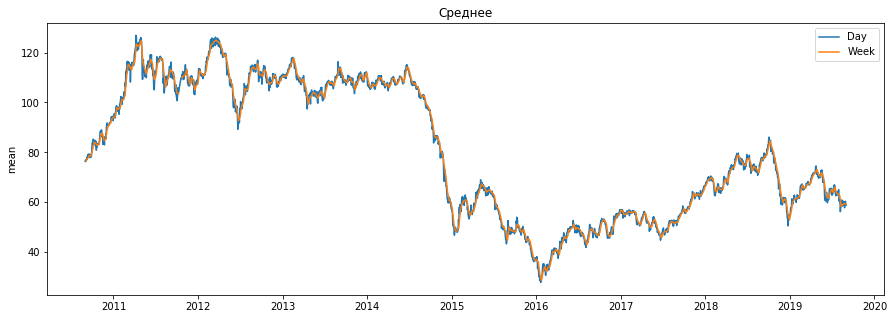

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(data, label='Day')
plt.plot(week.mean(), label='Week')
plt.title('Среднее')
plt.ylabel('mean')
plt.legend()
plt.show()

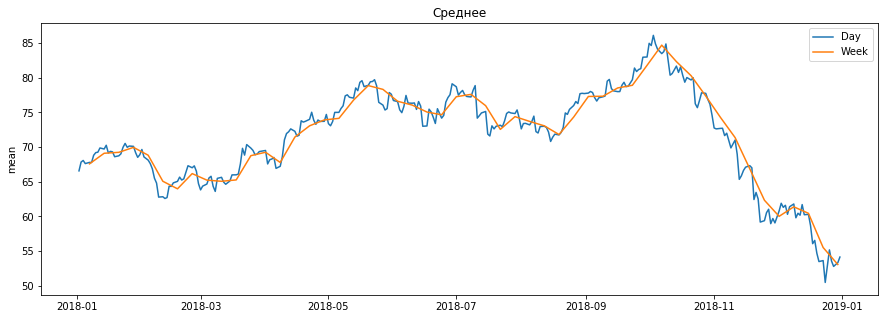

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(data['2018'], label='Day')
plt.plot(week.mean()['2018'], label='Week')
plt.title('Среднее')
plt.ylabel('mean')
plt.legend()
plt.show()

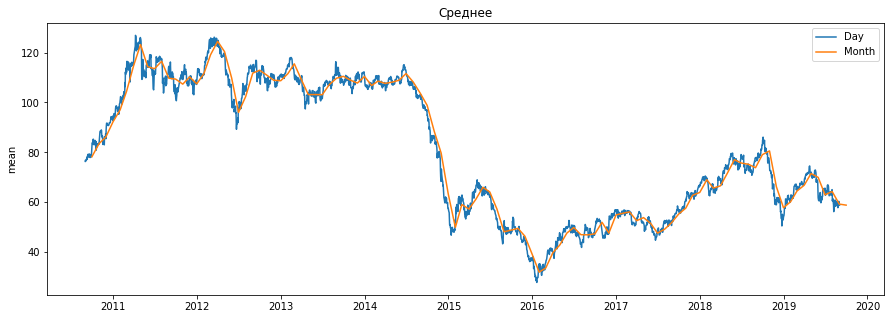

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(data, label='Day')
plt.plot(month.mean(), label='Month')
plt.title('Среднее')
plt.ylabel('mean')
plt.legend()
plt.show()

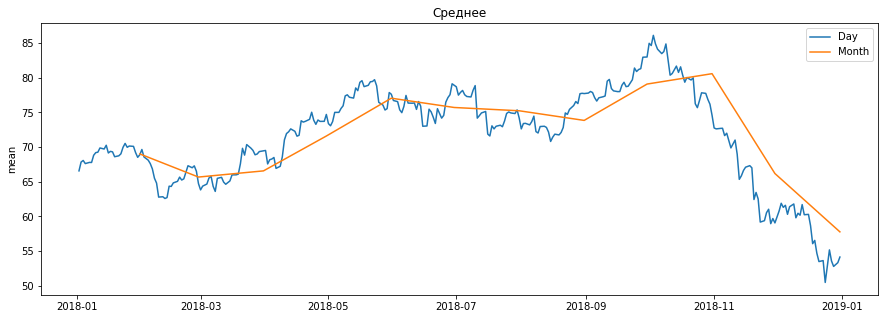

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(data['2018'], label='Day')
plt.plot(month.mean()['2018'], label='Month')
plt.title('Среднее')
plt.ylabel('mean')
plt.legend()
plt.show()

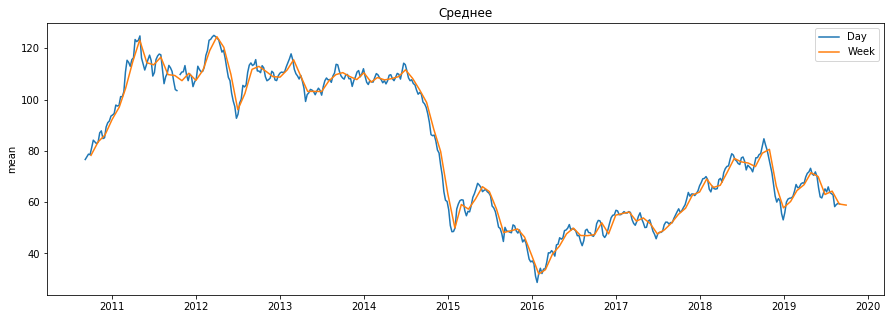

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(week.mean(), label='Day')
plt.plot(month.mean(), label='Week')
plt.title('Среднее')
plt.ylabel('mean')
plt.legend()
plt.show()

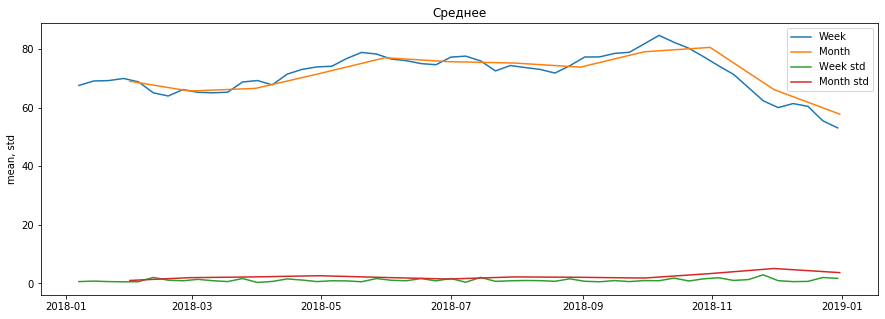

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(week.mean()['2018'], label='Week')
plt.plot(month.mean()['2018'], label='Month')
plt.plot(week.std()['2018'], label='Week std')
plt.plot(month.std()['2018'], label='Month std')
plt.title('Среднее')
plt.ylabel('mean, std')
plt.legend()
plt.show()

недельный график ближе к оригиналу, чем месячный. т.е. чем больше период, тем больше сглаженность.
стандартное отклонение показывает, разброс цены.